# 华为手表、PSG入睡潜伏期比较

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib.lines import Line2D

In [2]:
# 设置中文字体属性
font_path = '../data/SimHei.ttf'
font_prop  = fm.FontProperties(fname=font_path, size=16)

In [3]:
#读取华为手表入睡潜伏期
df = pd.read_excel("../result/华为手表完整入睡潜伏期.xlsx")
name = df['姓名']
labels = []
for i in name:
    labels.append(f"{i}前")
    labels.append(f"{i}后")


psg_latencies= []
huawei_latencies = []
for i in range(len(name)):
    psg_latencies.append(df["psg使用前入睡潜伏期"][i])
    psg_latencies.append(df["psg使用后入睡潜伏期"][i])
    huawei_latencies.append(df["使用前相差"][i])
    huawei_latencies.append(df["使用后相差"][i])

In [4]:
huawei_latencies = np.array(huawei_latencies)
psg_latencies = np.array(psg_latencies)

# 计算差值
latency_diff = np.abs(psg_latencies - huawei_latencies)

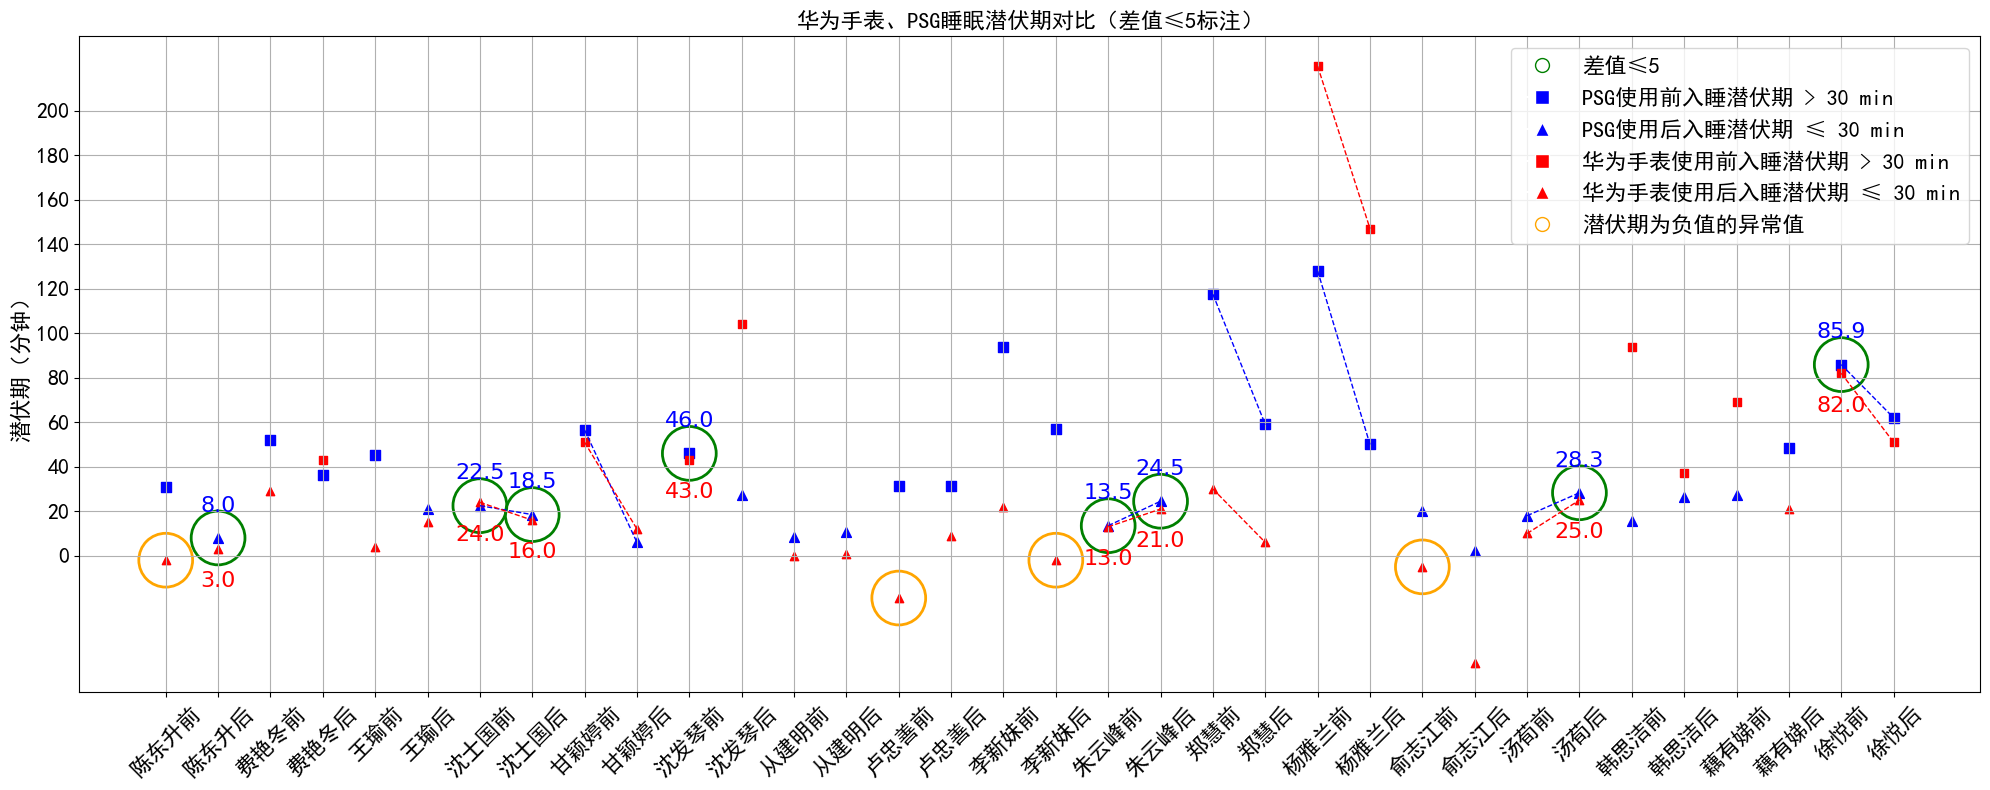

In [5]:
#作图
plt.figure(figsize=(20, 8))

# 根据数值绘制不同的标记
for i in range(len(psg_latencies)):
    # PSG 潜伏期标记，正方形或三角形
    marker_psg = 's' if psg_latencies[i] > 30 else '^'
    plt.scatter(i, psg_latencies[i], marker=marker_psg, color='b', label='PSG 潜伏期' if i == 0 else "" ,s=50)
    
    # 智能床潜伏期标记，正方形或三角形
    marker_bed = 's' if huawei_latencies[i] > 30 else '^'
    plt.scatter(i, huawei_latencies[i], marker=marker_bed, color='r', label='智能床 潜伏期' if i == 0 else "")
    
    # 标注差值在10以内的点并画圈
    if latency_diff[i] <= 5:
        plt.text(i, psg_latencies[i] + 10, f'{psg_latencies[i]:.1f}', ha='center', va='bottom', fontsize=16, color='blue')
        plt.text(i, huawei_latencies[i] - 10, f'{huawei_latencies[i]:.1f}', ha='center', va='top', fontsize=16, color='red')
        plt.scatter(i, psg_latencies[i], s=1500, facecolors='none', edgecolors='g', linewidths=2)

# 绘制两两连线
for i in range(0, len(psg_latencies), 2):
    if i + 1 < len(psg_latencies):
        # 计算两两差值
        psg_diff = psg_latencies[i + 1] - psg_latencies[i]
        bed_diff = huawei_latencies[i + 1] - huawei_latencies[i]

        if huawei_latencies[i]>0  and huawei_latencies[i+1]>0:
            
            if (psg_diff > 0 and bed_diff > 0) or (psg_diff < 0 and bed_diff < 0) :
                plt.plot([i, i+1], [psg_latencies[i], psg_latencies[i+1]], color='b', linestyle='--', linewidth=1)
                plt.plot([i, i+1], [huawei_latencies[i], huawei_latencies[i+1]], color='r', linestyle='--', linewidth=1)
                

        elif huawei_latencies[i]<0:
            plt.scatter(i, huawei_latencies[i], s=1500, facecolors='none', edgecolors='orange', linewidths=2)
        elif huawei_latencies[i+1]<0:
            plt.scatter(i+1, huawei_latencies[i+1], s=1500, facecolors='none', edgecolors='orange', linewidths=2)

# 添加中文标题和标签
plt.title('华为手表、PSG睡眠潜伏期对比（差值≤5标注）', fontproperties=font_prop,fontsize=16)
plt.ylabel('潜伏期（分钟）', fontproperties=font_prop,fontsize = 16)

# 设置 x 轴刻度和对应的标签
plt.xticks(np.arange(len(labels)), labels, rotation=45, fontproperties=font_prop,fontsize = 16)  # 将标签旋转45度
plt.yticks(np.arange(0, 201, 20), fontproperties=font_prop)  # 设置 y 轴刻度，每 20 为一个间隔
plt.grid(True)

# 创建自定义图例
legend_elements = [
    Line2D([0], [0], marker='o', color='green', markerfacecolor='none', markersize=10, label='差值≤5', linestyle='None'),
    Line2D([0], [0], marker='s', color='w', markerfacecolor='b', markersize=10, label='PSG使用前入睡潜伏期 > 30 min'),
    Line2D([0], [0], marker='^', color='w', markerfacecolor='b', markersize=10, label='PSG使用后入睡潜伏期 ≤ 30 min'),
    Line2D([0], [0], marker='s', color='w', markerfacecolor='r', markersize=10, label='华为手表使用前入睡潜伏期 > 30 min'),
    Line2D([0], [0], marker='^', color='w', markerfacecolor='r', markersize=10, label='华为手表使用后入睡潜伏期 ≤ 30 min'),
    Line2D([0], [0], marker='o', color='orange', markerfacecolor='none', markersize=10, label='潜伏期为负值的异常值', linestyle='None')
]

plt.legend(handles=legend_elements, prop=font_prop)

# 保存并显示图形
plt.savefig("../result/华为手表、PSG入睡潜伏期比较.png", dpi=1000)
plt.tight_layout()  # 调整布局避免标签被截断
plt.show()